In [1]:
#BUILD BY 강연철 2021.04.01

#필요한 라이브러리를 불러옵니다.
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from pandas.io.parsers import read_csv
import xlrd

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
#요일별 데이터를 불러옵니다.
data = np.array(read_csv('UID1_MON.csv',sep=','))

In [4]:
#날짜 데이터를 가져옵니다.
x_data = data[:, 5]
print(x_data)

[44277 44284 44291 44298 44305 44312 44319 44326 44333 44340 44347 44354
 44361 44368 44375 44382 44389 44396 44403 44410 44417 44424 44431 44438
 44445 44452 44459 44466 44473 44480 44487 44494 44501 44508 44515 44522
 44529 44536 44543 44550 44557 44564 44571 44578 44585 44592 44599 44606
 44613]


In [5]:
#시간 데이터를 가져옵니다.
y_data = data[:, 4]
print(y_data)

[0.30275463 0.256631944 0.283449074 0.326921296 0.280844907 0.306261574
 0.267997685 0.262465278 0.262662037 0.266041667 0.278391204 0.289212963
 0.298171296 0.323136574 0.311296296 0.262326389 0.253078704 0.296967593
 0.259039352 0.303321759 0.280092593 0.333321759 0.309525463 0.331215278
 0.307199074 0.307395833 0.273321759 0.283738426 0.29318287 0.297256944
 0.27630787 0.330509259 0.30212963 0.320960648 0.295474537 0.268171296
 0.323483796 0.28505787 0.261724537 0.325949074 0.325694444 0.284583333
 0.289456019 0.251550926 0.300081019 0.26400463 0.28837963 0.273518519
 0.317106481]


In [6]:
#학습을 위해 랜덤값의 변수로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

0 a: 0.07001175 b: -0.22248809 loss: 9679353.0


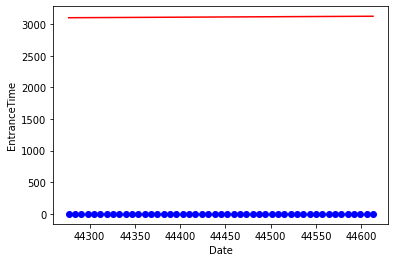

100 a: 0.0002545439 b: -0.29224533 loss: 115.11889


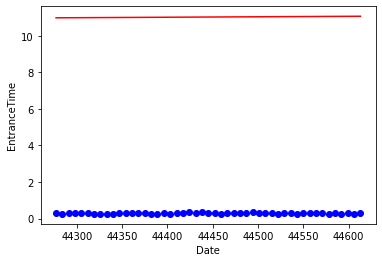

200 a: 1.2705047e-05 b: -0.29248714 loss: 0.0009211813


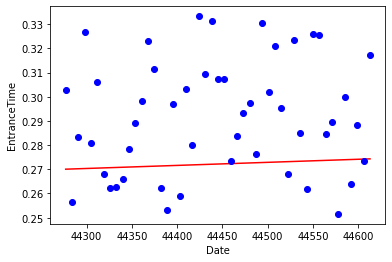

300 a: 1.3133635e-05 b: -0.2924867 loss: 0.0005420923


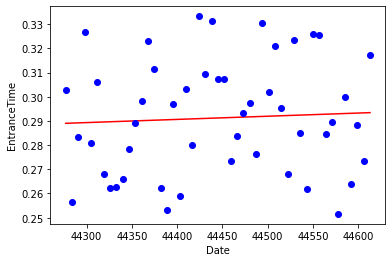

400 a: 1.3143174e-05 b: -0.2924867 loss: 0.00054191094


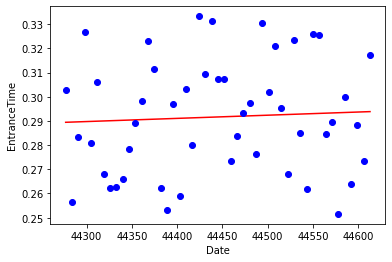

In [11]:
# 잔차의 제곱의 평균을 반환하는 함수입니다. 
def compute_loss(): 
  y_pred = a * x_data + b
  loss = tf.reduce_mean((y_data - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)

for i in range(500): 
  # 잔차의 제곱의 평균을 최소화(minimize) 합니다. 
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 0:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

    line_x = np.arange(min(x_data), max(x_data), 0.01)
    line_y = a * line_x + b
    
    # 그래프를 그립니다. 
    plt.plot(line_x, line_y, 'r-')
    plt.plot(x_data, y_data, 'bo')
    plt.xlabel('Date')
    plt.ylabel('EntranceTime')
    plt.show()

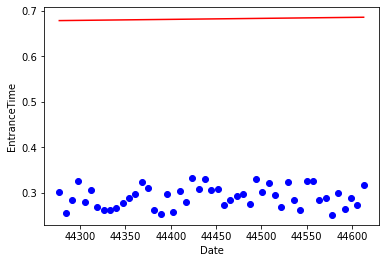

In [8]:
# 그래프를 그립니다. 
plt.plot(line_x, line_y, 'r-')
plt.plot(x_data, y_data, 'bo')
plt.xlabel('Date')
plt.ylabel('EntranceTime')
plt.show()

In [9]:
# 다음주의 예상 출/퇴근 시간을 예측합니다.
from datetime import time

prediction = a * 44620 + b
prediction = int(prediction * 24 * 3600)
my_time = time(prediction//3600, (prediction%3600)//60, prediction%60) # 시, 분, 초
print(my_time)

16:27:18
